<a href="https://colab.research.google.com/github/kilinandrea/mock_mabs/blob/main/drug_response_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import numpy as np
import pandas as pd

# Set random seed for reproducibility
np.random.seed(42)

# Number of samples
num_samples = 1000

# Generate independent variables
genetic_variant = np.random.choice([0, 1], size=num_samples)
gene_expression = np.random.normal(loc=10, scale=2, size=num_samples)  # Example mean and standard deviation
patient_age = np.random.randint(18, 56, size=num_samples)
disease_severity = np.random.randint(1, 4, size=num_samples)
treatment_duration = np.random.choice([3, 6, 9, 12], size=num_samples)

# Generate dependent variable
treatment_response = np.random.choice([0, 1], size=num_samples)

# Create DataFrame
data = pd.DataFrame({
    'GeneticVariant': genetic_variant,
    'GeneExpression': gene_expression,
    'PatientAge': patient_age,
    'DiseaseSeverity': disease_severity,
    'TreatmentDuration': treatment_duration,
    'TreatmentResponse': treatment_response
})

# Display first few rows of the DataFrame
print(data.head())


   GeneticVariant  GeneExpression  PatientAge  DiseaseSeverity  \
0               0       10.683512          25                1   
1               1       13.752342          32                3   
2               0       11.900848          34                1   
3               0        8.846193          40                2   
4               0        8.203171          41                1   

   TreatmentDuration  TreatmentResponse  
0                  3                  1  
1                  3                  1  
2                  6                  0  
3                  6                  1  
4                  3                  0  


In [13]:
# Summary statistics
print(data.describe())


       GeneticVariant  GeneExpression   PatientAge  DiseaseSeverity  \
count      1000.00000     1000.000000  1000.000000       1000.00000   
mean          0.51000       10.080333    36.800000          1.96300   
std           0.50015        2.002585    10.825765          0.82481   
min           0.00000        4.207489    18.000000          1.00000   
25%           0.00000        8.749991    28.000000          1.00000   
50%           1.00000       10.073267    37.000000          2.00000   
75%           1.00000       11.363197    46.000000          3.00000   
max           1.00000       16.157762    55.000000          3.00000   

       TreatmentDuration  TreatmentResponse  
count        1000.000000        1000.000000  
mean            7.725000           0.512000  
std             3.356284           0.500106  
min             3.000000           0.000000  
25%             6.000000           0.000000  
50%             9.000000           1.000000  
75%            12.000000           1.0

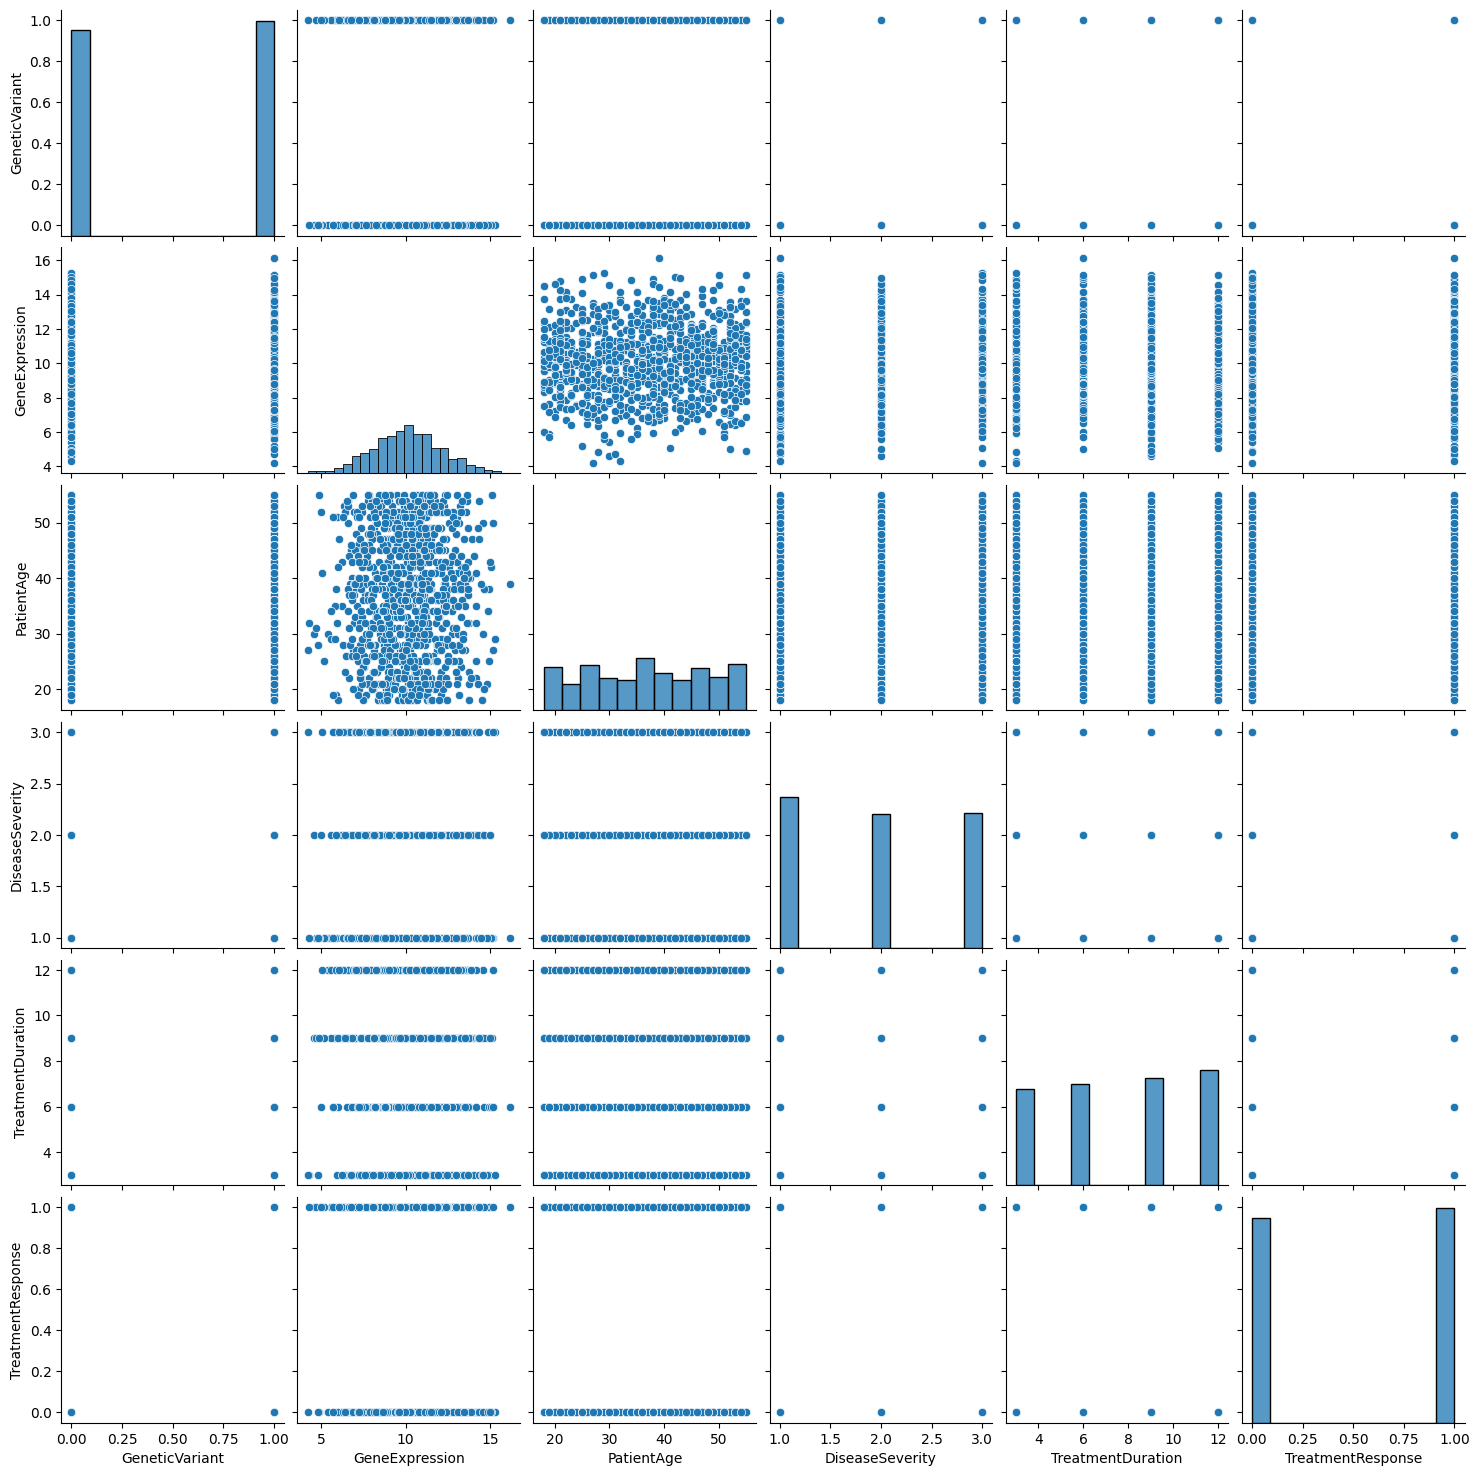

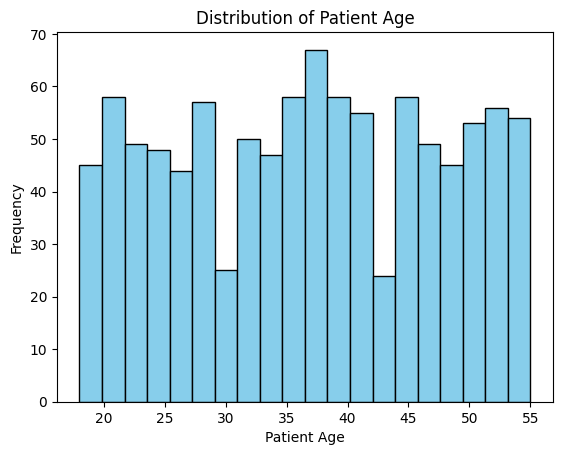

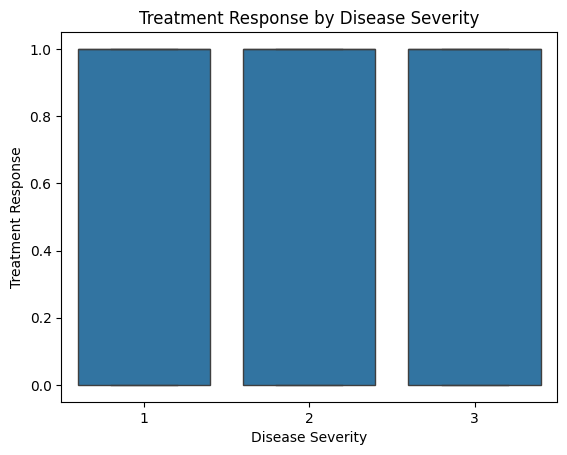

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Pairplot to visualize relationships between variables
sns.pairplot(data)
plt.show()

# Histogram of patient age
plt.hist(data['PatientAge'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Patient Age')
plt.ylabel('Frequency')
plt.title('Distribution of Patient Age')
plt.show()

# Boxplot of treatment response by disease severity
sns.boxplot(x='DiseaseSeverity', y='TreatmentResponse', data=data)
plt.xlabel('Disease Severity')
plt.ylabel('Treatment Response')
plt.title('Treatment Response by Disease Severity')
plt.show()


In [15]:
# Check for missing values
print(data.isnull().sum())


GeneticVariant       0
GeneExpression       0
PatientAge           0
DiseaseSeverity      0
TreatmentDuration    0
TreatmentResponse    0
dtype: int64


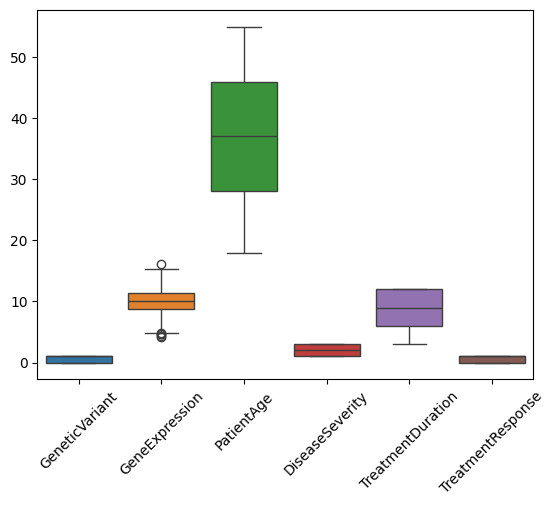

In [16]:
# Boxplot to visualize potential outliers
sns.boxplot(data=data)
plt.xticks(rotation=45)
plt.show()


In [17]:
# Correlation matrix
correlation_matrix = data.corr()
print(correlation_matrix)


                   GeneticVariant  GeneExpression  PatientAge  \
GeneticVariant           1.000000       -0.005888    0.003882   
GeneExpression          -0.005888        1.000000    0.021540   
PatientAge               0.003882        0.021540    1.000000   
DiseaseSeverity         -0.007595       -0.011277   -0.015627   
TreatmentDuration       -0.004025       -0.009458   -0.035209   
TreatmentResponse        0.031535        0.052019   -0.007876   

                   DiseaseSeverity  TreatmentDuration  TreatmentResponse  
GeneticVariant           -0.007595          -0.004025           0.031535  
GeneExpression           -0.011277          -0.009458           0.052019  
PatientAge               -0.015627          -0.035209          -0.007876  
DiseaseSeverity           1.000000          -0.014889           0.002291  
TreatmentDuration        -0.014889           1.000000           0.002863  
TreatmentResponse         0.002291           0.002863           1.000000  


Let's analyze the correlations to identify any highly correlated variables that may indicate multicollinearity:

**GeneExpression and PatientAge:**

The correlation coefficient between GeneExpression and PatientAge is 0.021540, which is relatively low. There is no strong linear relationship between these two variables, so multicollinearity is not a concern here.

**DiseaseSeverity and TreatmentDuration:**

The correlation coefficient between DiseaseSeverity and TreatmentDuration is -0.014889, which is also relatively low. There is no strong linear relationship between these two variables, indicating no multicollinearity.

**Other Variable Pairs:**

The correlations between other variable pairs(GeneticVariant with GeneExpression, PatientAge, DiseaseSeverity, and TreatmentDuration, and TreatmentResponse) are all close to zero, indicating weak or no linear relationships.

Based on the correlation matrix, there doesn't appear to be any significant multicollinearity among the variables. Therefore, I don't need to remove any variables due to multicollinearity at this stage. I can proceed with building the logistic regression model using all the available features.

In [24]:
import statsmodels.api as sm

# Define independent variables (features) including constant
X = sm.add_constant(data.drop('TreatmentResponse', axis=1))

# Define dependent variable
y = data['TreatmentResponse']

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build the logistic regression model using statsmodels
logit_model = sm.Logit(y_train, X_train)
result = logit_model.fit()

# Print summary statistics
print(result.summary())


Optimization terminated successfully.
         Current function value: 0.690343
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:      TreatmentResponse   No. Observations:                  800
Model:                          Logit   Df Residuals:                      794
Method:                           MLE   Df Model:                            5
Date:                Sun, 14 Apr 2024   Pseudo R-squ.:                0.004042
Time:                        11:37:49   Log-Likelihood:                -552.27
converged:                       True   LL-Null:                       -554.52
Covariance Type:            nonrobust   LLR p-value:                    0.4823
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.4490      0.499     -0.900      0.368      -1.426       0.528
GeneticV

Let's interpret the findings:

**Model Fit:**

The optimization terminated successfully, indicating that the logistic regression model converged.
The log-likelihood value is -552.27, indicating how well the model explains the data. A higher log-likelihood indicates a better fit.
The pseudo R-squared value is 0.004042, which is very low. This suggests that the model does not explain much of the variance in the dependent variable.

**Coefficients:**

Coefficients represent the log odds of the probability of the dependent variable (TreatmentResponse) being 1 (success) versus 0 (failure) for each unit change in the independent variables.
The coefficient for GeneticVariant is 0.2466, indicating that for each unit increase in GeneticVariant, the log odds of TreatmentResponse being 1 increase by 0.2466.
Similarly, the coefficients for GeneExpression, PatientAge, DiseaseSeverity, and TreatmentDuration represent the log odds of TreatmentResponse being 1 for each unit increase in the respective independent variables.

**Statistical Significance:**

The p-values associated with each coefficient indicate the statistical significance of the corresponding independent variable.
A p-value less than the chosen significance level (e.g., 0.05) suggests that the coefficient is statistically significant.
In this case, none of the coefficients are statistically significant at the 0.05 level, as all p-values are greater than 0.05.


**Interpretation:**

Based on the p-values, **none** of the independent variables (GeneticVariant, GeneExpression, PatientAge, DiseaseSeverity, TreatmentDuration) have a statistically significant impact on TreatmentResponse at the 0.05 significance level in this model.
Given that none of the independent variables are statistically significant, it may be necessary to revisit the model, possibly by:



*   Considering interactions between variables.
*   Exploring non-linear relationships or transformations of variables.
*  Adding additional variables that may be relevant to the outcome.
*  Checking for data quality issues or outliers that may be affecting the results.